In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('bestsellers with categories.csv')
df.head(15)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [3]:
no_duplicates=df.drop_duplicates('Name')
no_duplicates.shape

(351, 7)

#### There are 351 unique books in total from the year 2009 to 2019


## What is the aim of performing EDA on this dataset
### A. How is the sales of each genre in each year,is it influenced by the Genre?
### B. Is there any relation between Price of the book and year?
### C. which genre books have generally high prices in every year?
### D. which genre have more reviews?
### E. Is user rating and reviews connected?
### F.  Did people buy books depending on the prices?

In [4]:
df_year_wise=df.set_index('Year')
df_year_wise.head()

,Name,Author,User Rating,Reviews,Price,Genre
Year,,,,,,
2016,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
2011,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2018,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
2017,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
2019,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction


In [5]:
df_year_wise.index.value_counts()

2019    50
2018    50
2017    50
2016    50
2015    50
2014    50
2013    50
2012    50
2011    50
2010    50
2009    50
Name: Year, dtype: int64

In [6]:
pd.to_datetime(df_year_wise.index);

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [8]:
#changing the datatype to 'Category'
df['Genre']=df['Genre'].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         550 non-null    object  
 1   Author       550 non-null    object  
 2   User Rating  550 non-null    float64 
 3   Reviews      550 non-null    int64   
 4   Price        550 non-null    int64   
 5   Year         550 non-null    int64   
 6   Genre        550 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 26.5+ KB


In [10]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


#### Minimum price of book is 0 which is not possible so checking those columns and imputing values

In [11]:
df[df['Price']==0]

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction


#### minimum price of a book is shown to be 0 which is highly unlikely and might be a typing to replacing those value by 9

In [12]:
#replacing the price 0 by 9 because the missing prices vary with maximum books having prices 9,10 when checked on amazon
df['Price'].replace({0:9},inplace=True)

In [13]:
df.describe()#mean and standard deviation of the price are almost after imputing the columns having price 0 with 10

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.296364,2014.000000
std,0.226980,11731.132017,10.683277,3.165156
min,3.300000,37.000000,1.000000,2009.000000
25%,4.500000,4058.000000,8.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [14]:
no_duplicates['Genre'].value_counts(normalize=True)

Non Fiction    0.54416
Fiction        0.45584
Name: Genre, dtype: float64

### Out of total 351 unique books there are 54.4 % Non Fiction books and 45.6% Fiction books. Let's visualize the data according to the genre.

In [15]:
genre_count = no_duplicates['Genre'].value_counts()

<ipython-input-16-27bc53d2887a>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


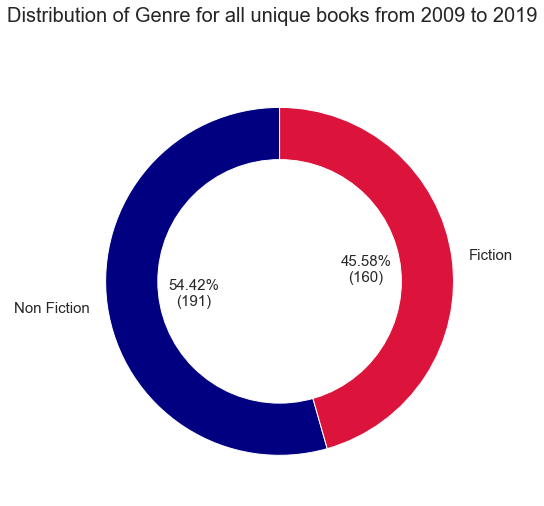

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['navy','crimson'] # colors for the chart

center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=genre_count.values, labels=genre_count.index, autopct=make_autopct(genre_count.values), 
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col)
ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
fig.show()

In [17]:
df_year_wise.groupby(df_year_wise.index)['Genre'].value_counts(normalize=True)

Year  Genre      
2009  Non Fiction    0.52
      Fiction        0.48
2010  Non Fiction    0.60
      Fiction        0.40
2011  Non Fiction    0.58
      Fiction        0.42
2012  Non Fiction    0.58
      Fiction        0.42
2013  Non Fiction    0.52
      Fiction        0.48
2014  Fiction        0.58
      Non Fiction    0.42
2015  Non Fiction    0.66
      Fiction        0.34
2016  Non Fiction    0.62
      Fiction        0.38
2017  Non Fiction    0.52
      Fiction        0.48
2018  Non Fiction    0.58
      Fiction        0.42
2019  Non Fiction    0.60
      Fiction        0.40
Name: Genre, dtype: float64

In [18]:
pd.crosstab(df['Genre'],df['Year'],colnames=['year'])

year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Genre,,,,,,,,,,,
Fiction,24,20,21,21,24,29,17,19,24,21,20
Non Fiction,26,30,29,29,26,21,33,31,26,29,30


<ipython-input-19-6b0cb23b2266>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


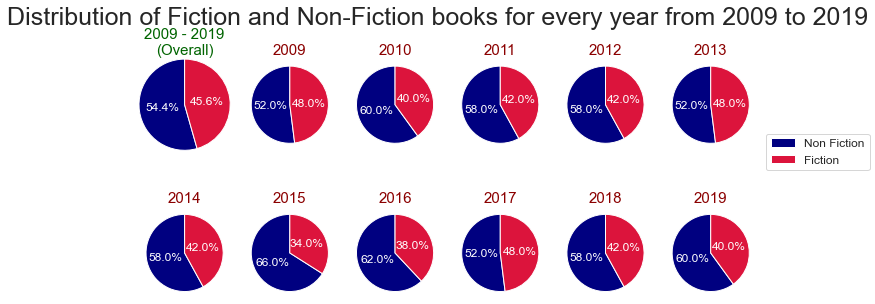

In [19]:
y1 = np.arange(2009,2014)
y2 = np.arange(2014,2020)

fig, ax = plt.subplots(2, 6, figsize=(11,5))

ax[0,0].pie(x=genre_count.values, labels=None, autopct='%1.1f%%',
            startangle=90, textprops={'size': 12, 'color': 'white'},
            pctdistance=0.5, radius=1.3, colors=genre_col)
ax[0,0].set_title('2009 - 2019\n(Overall)', color='darkgreen', fontdict={'fontsize': 15})

for i, year in enumerate(y1):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize': 15})
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                  startangle=90, textprops={'size': 12,'color': 'white'}, 
                  pctdistance=0.5, colors=genre_col, radius=1.1)

for i, year in enumerate(y2):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                startangle=90, textprops={'size': 12,'color': 'white'},
                pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize': 15})

plt.suptitle('Distribution of Fiction and Non-Fiction books for every year from 2009 to 2019',
             fontsize=25)
fig.legend(genre_count.index, loc='center right', fontsize=12)
fig.show()

#### Only the year 2014 saw more sales of FICTION books,has price influenced the sales?
#### Comparing it with different years to see if there is a different trend

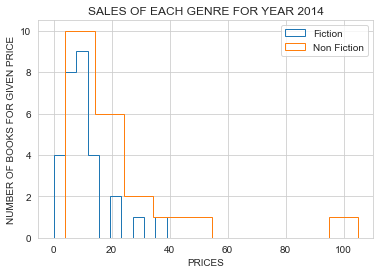

In [20]:
df_2014=df_year_wise.loc[2014]
df_2014_fiction=df_2014[df_2014['Genre']=='Fiction']
df_2014_non_fiction=df_2014[df_2014['Genre']=='Non Fiction']
fig,ax=plt.subplots()
ax.hist(df_2014_fiction['Price'],label='Fiction',histtype='step')
ax.hist(df_2014_non_fiction['Price'],label='Non Fiction',histtype='step')
ax.set_xlabel('PRICES')
ax.set_ylabel('NUMBER OF BOOKS FOR GIVEN PRICE')
ax.set_title('SALES OF EACH GENRE FOR YEAR 2014')
ax.legend()
plt.show()

In [21]:
df_2014[df_2014['Genre']=="Fiction"]['Price'].mean()

10.172413793103448

In [22]:
df_2014[df_2014['Genre']=='Non Fiction']['Price'].mean()

20.80952380952381

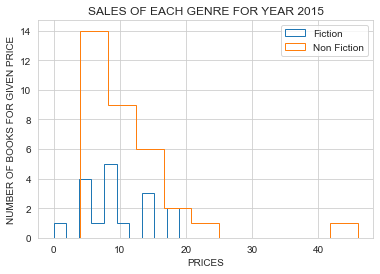

In [23]:
df_2015 = df_year_wise.loc[2015]
df_2015_fiction=df_2015[df_2015['Genre']=='Fiction']
df_2015_non_fiction=df_2015[df_2015['Genre']=='Non Fiction']
fig,ax=plt.subplots()
ax.hist(df_2015_fiction['Price'],label='Fiction',histtype='step')
ax.hist(df_2015_non_fiction['Price'],label='Non Fiction',histtype='step')
ax.set_xlabel('PRICES')
ax.set_ylabel('NUMBER OF BOOKS FOR GIVEN PRICE')
ax.set_title('SALES OF EACH GENRE FOR YEAR 2015')
ax.legend()
plt.show()

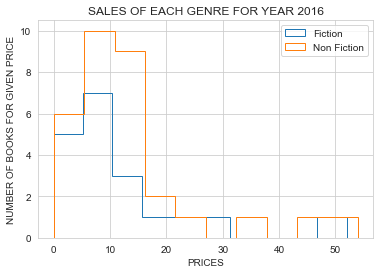

In [24]:
df_2016=df_year_wise.loc[2016]
df_2016_fiction=df_2016[df_2016['Genre']=='Fiction']
df_2016_non_fiction=df_2016[df_2016['Genre']=='Non Fiction']
fig,ax=plt.subplots()
ax.hist(df_2016_fiction['Price'],label='Fiction',histtype='step')
ax.hist(df_2016_non_fiction['Price'],label='Non Fiction',histtype='step')
ax.set_xlabel('PRICES')
ax.set_ylabel('NUMBER OF BOOKS FOR GIVEN PRICE')
ax.set_title('SALES OF EACH GENRE FOR YEAR 2016')
ax.legend()
plt.show()

### As seen from the above 3 plots even though the price of Non Fiction is more the sales of Non Fiction was more so prices dont influence the sales but the quality does

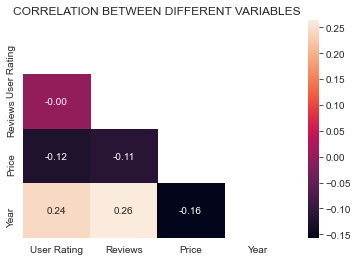

In [25]:
#plotting a correlation matrix to see all the correlation
corr=df.corr()
#removing duplicating values from the correlation matrix using np.triu for upper triangle
mask = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,annot = True, fmt='.2f')
plt.title('CORRELATION BETWEEN DIFFERENT VARIABLES')
plt.show()

### One thing to note from above correlation matrix is that we have "0" correlation between Reviews and User Rating i.e they are totally uncorrelated features and there very little correlation between features

In [26]:
years=list(np.sort(df_year_wise.index.unique()))
years

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [27]:
df.groupby('Year')["Price"].mean()#negative correlation is there

Year
2009    15.40
2010    13.66
2011    15.28
2012    15.30
2013    14.96
2014    15.36
2015    10.60
2016    13.54
2017    11.56
2018    10.52
2019    10.08
Name: Price, dtype: float64

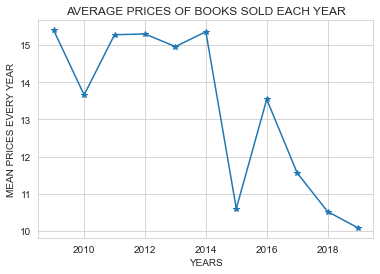

In [28]:
plt.plot(years,df.groupby(['Year'])["Price"].mean(),marker='*')
plt.xlabel("YEARS")
plt.ylabel('MEAN PRICES EVERY YEAR')
plt.title('AVERAGE PRICES OF BOOKS SOLD EACH YEAR')
plt.show()

In [29]:
count_genre_fiction=[]
count_genre_non_fiction=[]
for i in range(1,12):
    year = int(2008) + int(i)
    count_genre_fiction.append((df_year_wise.loc[year,'Genre']=='Fiction').sum())
    count_genre_non_fiction.append((df_year_wise.loc[year,'Genre']=='Non Fiction').sum())

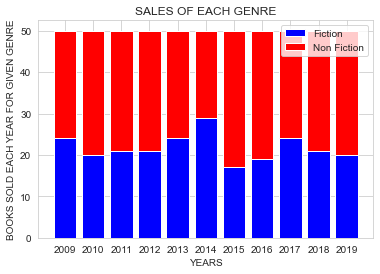

In [30]:
fig,ax=plt.subplots()
ax.bar(years,count_genre_fiction,label='Fiction',color='blue',tick_label=years)
ax.bar(years,count_genre_non_fiction,label='Non Fiction',color='red',bottom=count_genre_fiction)
ax.set_xticklabels(years)
ax.set_xlabel('YEARS')
ax.set_ylabel('BOOKS SOLD EACH YEAR FOR GIVEN GENRE')
ax.set_title('SALES OF EACH GENRE')
ax.legend()
plt.show()

In [31]:
df_year_wise_fiction=df_year_wise[df_year_wise['Genre']=='Fiction']
df_year_wise_non_fiction=df_year_wise[df_year_wise['Genre']=='Non Fiction']
fiction_avg=df_year_wise_fiction.groupby('Year')['Price'].mean()
non_fiction_avg=df_year_wise_non_fiction.groupby('Year')['Price'].mean()

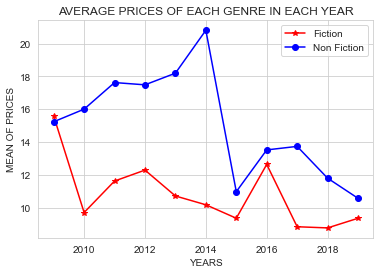

In [32]:
plt.plot(years,fiction_avg,label='Fiction',color='red',marker='*')
plt.plot(years,non_fiction_avg,label='Non Fiction',color='blue',marker='o')
plt.legend()
plt.xlabel('YEARS')
plt.ylabel('MEAN OF PRICES')
plt.title('AVERAGE PRICES OF EACH GENRE IN EACH YEAR')
plt.show()

### Non Fiction have high prices in comparison to Fiction books

In [33]:
df_year_wise_non_fiction.shape

(310, 6)

In [34]:
#number of reviews on each genre
print('Average number of reviews on Fiction books is {}'.format(round(df_year_wise_fiction['Reviews'].mean(),2)))
print('Average number of reviews on Non Fiction books is {}'.format(round(df_year_wise_non_fiction['Reviews'].mean(),2)))

Average number of reviews on Fiction books is 15683.79
Average number of reviews on Non Fiction books is 9065.15


#### Fiction books have more reviews even though there is more sales of Non Fiction books in almost all years this is because a particular fiction book was bought by more people  

### Top 10 authors of each genre

In [47]:
best_nf_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:10]
best_f_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Fiction'].sort_values(ascending=False)[:10]
best_nf_authors

Author
Gary Chapman                          11
American Psychological Association    10
Gallup                                 9
Rob Elliott                            8
Bill O'Reilly                          7
Stephen R. Covey                       7
Don Miguel Ruiz                        6
Sarah Young                            6
The College Board                      6
Roger Priddy                           5
Name: (Name, Non Fiction), dtype: int64

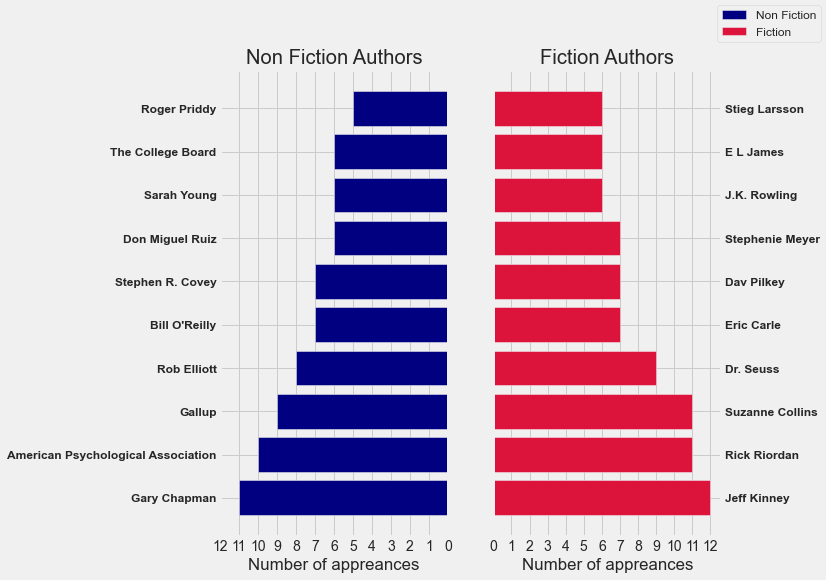

In [62]:
#other styles can be used, for more style go through "style.available"
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 2, figsize=(8,8))
    
    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values,
           color=genre_col[0])
    ax[0].invert_xaxis()
    #ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
    ax[0].set_xlabel('Number of appreances')
    ax[0].set_title('Non Fiction Authors')
    
    ax[1].barh(y=best_f_authors.index, width=best_f_authors.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')
    ax[1].set_title('Fiction Authors')
    ax[1].set_xlabel('Number of appreances')
    
    fig.legend(['Non Fiction', 'Fiction'], fontsize=12)
    
plt.show()

## Summarizing the 20 best authors and their appearances. There are multiple apperances also so we will look at both

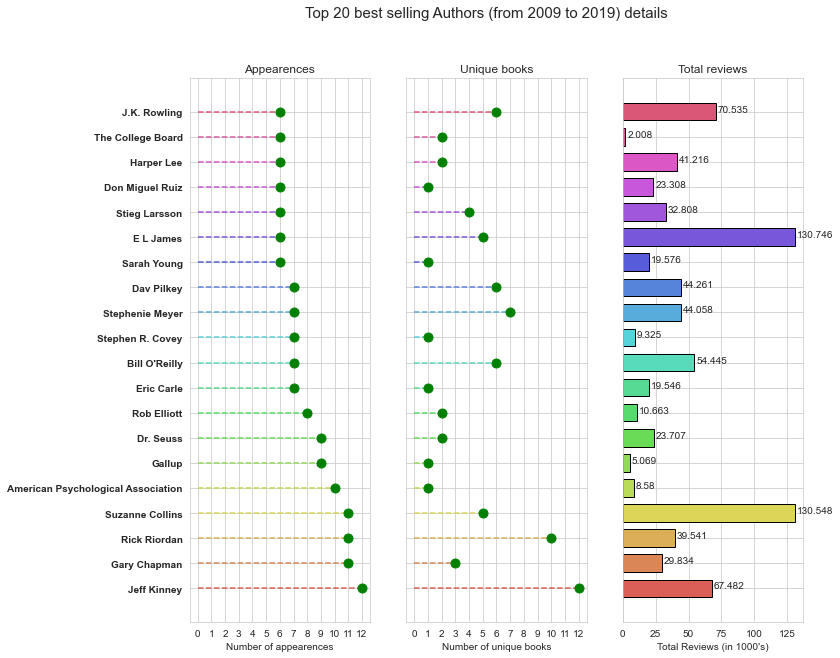

In [83]:
n_best = 20

top_authors = df.Author.value_counts().nlargest(n_best)
no_dup = df.drop_duplicates('Name') # removes all rows with duplicate book names

fig, ax = plt.subplots(1, 3, figsize=(11,10), sharey=True)


color = sns.color_palette("hls", n_best)

ax[0].hlines(y=top_authors.index , xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearences')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[0].set_title('Appearences')

book_count = []
total_reviews = []
for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum()/1000)
ax[1].hlines(y=top_authors.index , xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+1.5,name,val)# val+1.5 for spacing between the horizontal bar ending and
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total reviews')

plt.suptitle('Top 20 best selling Authors (from 2009 to 2019) details', fontsize=15)
plt.show()

In [37]:
df[df.loc[:,'Author']=='Jeff Kinney'].sort_values(by='Year')

,Name,Author,User Rating,Reviews,Price,Year,Genre
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
474,"The Ugly Truth (Diary of a Wimpy Kid, Book 5)",Jeff Kinney,4.8,3796,12,2010,Fiction
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,9,2011,Fiction
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,9,2013,Fiction
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,9,2017,Fiction


#### Clearly from the data we can see that Diary of a wimpy kid was great hit with almost books as best sellers in all consecutive years

In [38]:
df[df.loc[:,'Author']=='Suzanne Collins'].sort_values(by='Year')

,Name,Author,User Rating,Reviews,Price,Year,Genre
46,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2010,Fiction
236,Mockingjay (The Hunger Games),Suzanne Collins,4.5,26741,8,2010,Fiction
407,The Hunger Games,Suzanne Collins,4.7,32122,14,2010,Fiction
47,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2011,Fiction
237,Mockingjay (The Hunger Games),Suzanne Collins,4.5,26741,8,2011,Fiction
408,The Hunger Games (Book 1),Suzanne Collins,4.7,32122,8,2011,Fiction
410,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,2011,Fiction
48,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2012,Fiction
238,Mockingjay (The Hunger Games),Suzanne Collins,4.5,26741,8,2012,Fiction
409,The Hunger Games (Book 1),Suzanne Collins,4.7,32122,8,2012,Fiction


#### The hunger games books were best sellers on Amazon for three consecutive years 

In [39]:
df[df.loc[:,'Author']=='Rick Riordan'].sort_values(by='Year')

,Name,Author,User Rating,Reviews,Price,Year,Genre
418,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,4.8,4628,7,2009,Fiction
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010,Fiction
419,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,4.8,4628,7,2010,Fiction
428,"The Lost Hero (Heroes of Olympus, Book 1)",Rick Riordan,4.8,4506,14,2010,Fiction
456,"The Red Pyramid (The Kane Chronicles, Book 1)",Rick Riordan,4.6,2186,12,2010,Fiction
463,"The Son of Neptune (Heroes of Olympus, Book 2)",Rick Riordan,4.8,4290,10,2011,Fiction
469,"The Throne of Fire (The Kane Chronicles, Book 2)",Rick Riordan,4.7,1463,10,2011,Fiction
432,"The Mark of Athena (Heroes of Olympus, Book 3)",Rick Riordan,4.8,6247,10,2012,Fiction
458,"The Serpent's Shadow (The Kane Chronicles, Boo...",Rick Riordan,4.8,2091,12,2012,Fiction
406,"The House of Hades (Heroes of Olympus, Book 4)",Rick Riordan,4.8,6982,14,2013,Fiction


In [40]:
df[df.loc[:,'Author']=='Gary Chapman'].sort_values(by='Year')

,Name,Author,User Rating,Reviews,Price,Year,Genre
374,The Five Love Languages: How to Express Heartf...,Gary Chapman,4.6,803,9,2009,Non Fiction
320,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2010,Non Fiction
321,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2011,Non Fiction
322,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2012,Non Fiction
323,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2013,Non Fiction
324,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2014,Non Fiction
325,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8,2015,Non Fiction
326,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8,2016,Non Fiction
327,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8,2017,Non Fiction
328,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8,2018,Non Fiction


#### The first non fiction book in top 5 best sellers with the same book sold in each year 

In [41]:
df[df.loc[:,'Author']=='American Psychological Association'].sort_values(by='Year')

,Name,Author,User Rating,Reviews,Price,Year,Genre
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction
272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
274,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2012,Non Fiction
275,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction
276,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2014,Non Fiction
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
278,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2016,Non Fiction
279,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2017,Non Fiction
280,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2018,Non Fiction


### Did prices stop the books from being a bestseller?

In [42]:
#mean price of is 13.32 so counting if more bestsellers of less prices were brought
(df['Price']>14).shape

(550,)

In [43]:
(df["Price"]<14).shape

(550,)

In [44]:
df.sort_values(by='Price',ascending=False)

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non Fiction
...,...,...,...,...,...,...,...
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010,Fiction
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction
389,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,10559,2,2010,Fiction
388,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,10559,2,2009,Fiction


#### Price of the book isnt stopping it from making it a best seller

## Does the books which have less price have more reviews? 

In [45]:
df[df['Price']>14]['Reviews'].sum()

1567333

In [46]:
df[df['Price']<14]['Reviews'].sum()

4603103

#### Less price books have more reviews which means that the sale of those books was more as compared to books having high prices